In [3]:
# %load model_vis.py
from build_vocab import WordVocab
from dataset import Seq2seqDataset
import pandas as pd
import hiddenlayer as hl
from torchsummary import summary
from pretrain_trfm import TrfmSeq2seq
import torch

vocab = WordVocab.load_vocab("../data/vocab.pkl")
dataset = Seq2seqDataset(pd.read_csv("../data/chembl_24.csv")['canonical_smiles'].values, vocab)
model = TrfmSeq2seq(len(vocab), 220, len(vocab), 3)
print(model)
# summary(model,input_size=(1, len(vocab), 220, len(vocab), 3))
# (torch.int64)


TrfmSeq2seq(
  (embed): Embedding(51, 220)
  (pe): PositionalEncoding(
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (trfm): Transformer(
    (encoder): TransformerEncoder(
      (layers): ModuleList(
        (0): TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): Linear(in_features=220, out_features=220, bias=True)
          )
          (linear1): Linear(in_features=220, out_features=220, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=220, out_features=220, bias=True)
          (norm1): LayerNorm((220,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((220,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
        (1): TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): Linear(in_features=220, out_features=220, bias=True)
       

/data2/mhassan/smiles-transformer/smiles_transformer/pretrain_trfm.py:40: TracerWarning: Converting a tensor to a Python index might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  x = x + Variable(self.pe[:, :x.size(1)],
/home/mhassan/miniconda3/envs/smiles_transformer/lib/python3.6/site-packages/torch/onnx/symbolic_opset9.py:1168: UserWarning: Dropout is a training op and should not be exported in inference mode. Make sure to call eval() on the model, and to export it with param training=False.
  warnings.warn("Dropout is a training op and should not be exported in inference mode. "


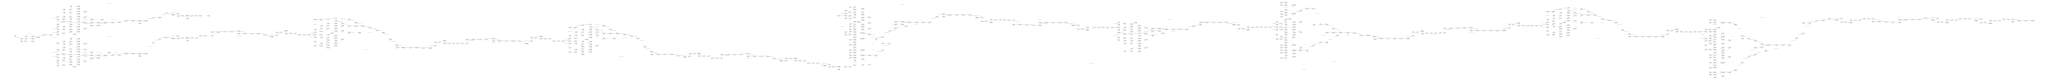

In [4]:
hl.build_graph(model, torch.zeros([220, 8]).to(torch.int64))

In [13]:
from torchsummaryX import summary

In [15]:
print(summary(model, torch.zeros(220, 8).long(), ))

                                          Kernel Shape   Output Shape  \
Layer                                                                   
0_embed                                      [220, 51]  [220, 8, 220]   
1_pe.Dropout_dropout                                 -  [220, 8, 220]   
2_trfm.encoder.layers.0.Dropout_dropout1             -  [220, 8, 220]   
3_trfm.encoder.layers.0.LayerNorm_norm1          [220]  [220, 8, 220]   
4_trfm.encoder.layers.0.Linear_linear1      [220, 220]  [220, 8, 220]   
5_trfm.encoder.layers.0.Dropout_dropout              -  [220, 8, 220]   
6_trfm.encoder.layers.0.Linear_linear2      [220, 220]  [220, 8, 220]   
7_trfm.encoder.layers.0.Dropout_dropout2             -  [220, 8, 220]   
8_trfm.encoder.layers.0.LayerNorm_norm2          [220]  [220, 8, 220]   
9_trfm.encoder.layers.1.Dropout_dropout1             -  [220, 8, 220]   
10_trfm.encoder.layers.1.LayerNorm_norm1         [220]  [220, 8, 220]   
11_trfm.encoder.layers.1.Linear_linear1     [220, 2